# RDKit Tutorial: Introduction to Cheminformatics

This tutorial provides a hands-on introduction to cheminformatics using RDKit, a powerful open-source toolkit for molecular manipulation and analysis. Throughout this tutorial, you'll learn how to:

1. Work with molecular representations (SMILES)
2. Visualize molecules in 2D and 3D
3. Analyze molecular properties and descriptors
4. Perform substructure searches
5. Generate and manipulate 3D conformers
6. Convert between different molecular formats

Let's start by importing the required libraries and setting up our environment.

In [49]:
# Core scientific computing
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import itertools
import os

# Interactive visualization
try:
    import ipywidgets as widgets
    from ipywidgets import interact, interactive, fixed
except:
    !pip install ipywidgets
    import ipywidgets as widgets
    from ipywidgets import interact, interactive, fixed

try:
    from IPython.display import display
except:
    !pip install IPython
    from IPython.display import display

# RDKit imports
try:
    from rdkit import Chem, RDConfig
    from rdkit.Chem import (
        Draw, rdmolops, AllChem, DataStructs, rdCIPLabeler, 
        rdMolAlign, rdDetermineBonds, rdFingerprintGenerator,
        Descriptors
    )
    from rdkit.Chem.Draw import rdMolDraw2D, IPythonConsole
except:
    !pip install rdkit # pip install --force-reinstall -v rdkit==2025.03.6
    from rdkit import Chem, RDConfig
    from rdkit.Chem import (
        Draw, rdmolops, AllChem, DataStructs, rdCIPLabeler, 
        rdMolAlign, rdDetermineBonds, rdFingerprintGenerator,
        Descriptors
    )
    from rdkit.Chem.Draw import rdMolDraw2D, IPythonConsole

# 3D visualization
try:
    import py3Dmol
except:
    !pip install py3Dmol
    import py3Dmol

In [50]:
print(f"RDKit version: {Chem.rdBase.rdkitVersion}")
assert Chem.rdBase.rdkitVersion >= '2025.03.6', "Please update your RDKit version to 2025.03.6 or later."

RDKit version: 2025.03.6


# Understanding SMILES Notation

SMILES (Simplified Molecular Input Line Entry System) is a line notation for describing the structure of chemical species using short ASCII strings. For example:
- `CCC` represents propane
- `C=C` represents ethene
- `c1ccccc1` represents benzene (aromatic)
- `CC(=O)O` represents acetic acid

Below, we'll create an interactive widget that allows you to input SMILES strings and visualize the corresponding molecules in 2D.

In [51]:
# What are smiles and how to write smiles
# Drawing 2D smiles

smiles_1 = 'CCC'
mol_fix = Chem.MolFromSmiles(smiles_1)
img_fix = Draw.MolToImage(mol_fix)

# Create a text input widget for the SMILES string
smiles_input = widgets.Text(description='SMILES:', width=200)

# Create a drawing area to display the molecule
mol_image = widgets.Output()

# Define a function to update the molecule drawing
def update_molecule(sender):
    smiles = smiles_input.value
    mol = Chem.MolFromSmiles(smiles)
    mol_image.clear_output(wait=True)
    with mol_image:
        if mol is not None:
            img = Draw.MolToImage(mol)
            display(img)

# Register the update function to be called whenever the input is changed
smiles_input.observe(update_molecule, 'value')

# Display the widgets
# display(img_fix)
display(smiles_input)
display(mol_image)

Text(value='', description='SMILES:')

Output()

In [52]:
# How to use rdkit molecule objects

smiles_1 = 'CCC'
mol = Chem.MolFromSmiles(smiles_1)
img = Draw.MolToImage(mol_fix)

# See attributes and methods
print(mol.__dir__())

['__module__', '__doc__', '__reduce__', '__instance_size__', '__init__', '__copy__', '__deepcopy__', 'GetNumAtoms', 'GetNumHeavyAtoms', 'GetAtomWithIdx', 'GetNumBonds', 'GetBondWithIdx', 'GetNumConformers', 'AddConformer', 'GetConformer', 'GetConformers', 'RemoveAllConformers', 'RemoveConformer', 'GetBondBetweenAtoms', 'HasQuery', 'HasSubstructMatch', 'GetSubstructMatch', 'GetSubstructMatches', 'SetProp', 'SetDoubleProp', 'SetIntProp', 'SetUnsignedProp', 'SetBoolProp', 'HasProp', 'GetProp', 'GetDoubleProp', 'GetIntProp', 'GetUnsignedProp', 'GetBoolProp', 'ClearProp', 'ClearComputedProps', 'UpdatePropertyCache', 'NeedsUpdatePropertyCache', 'ClearPropertyCache', 'GetStereoGroups', 'GetPropNames', 'GetPropsAsDict', 'GetAromaticAtoms', 'GetAtomsMatchingQuery', '__safe_for_unpickling__', '__getstate_manages_dict__', '__getinitargs__', '__getstate__', '__setstate__', 'Debug', 'ToBinary', 'GetRingInfo', 'GetAtoms', 'GetBonds', '_repr_png_', '_repr_svg_', '_repr_html_', '__GetSubstructMatch', 

In [53]:

# Iterate over atoms
for atom in mol.GetAtoms():
    print(atom)
print(atom.__dir__())

['__module__', '__doc__', '__reduce__', '__instance_size__', '__init__', '__copy__', 'GetAtomicNum', 'SetAtomicNum', 'GetSymbol', 'GetIdx', 'GetDegree', 'GetTotalDegree', 'GetTotalNumHs', 'GetNumImplicitHs', 'GetExplicitValence', 'GetImplicitValence', 'GetValence', 'GetTotalValence', 'HasValenceViolation', 'GetFormalCharge', 'SetFormalCharge', 'SetNoImplicit', 'GetNoImplicit', 'SetNumExplicitHs', 'GetNumExplicitHs', 'SetIsAromatic', 'GetIsAromatic', 'GetMass', 'SetIsotope', 'GetIsotope', 'SetNumRadicalElectrons', 'GetNumRadicalElectrons', 'GetQueryType', 'SetChiralTag', 'InvertChirality', 'GetChiralTag', 'SetHybridization', 'GetHybridization', 'HasOwningMol', 'GetOwningMol', 'GetNeighbors', 'GetBonds', 'Match', 'IsInRingSize', 'IsInRing', 'HasQuery', 'DescribeQuery', 'GetSmarts', 'SetProp', 'GetProp', 'SetIntProp', 'SetUnsignedProp', 'GetIntProp', 'GetUnsignedProp', 'SetDoubleProp', 'GetDoubleProp', 'SetBoolProp', 'GetBoolProp', 'SetExplicitBitVectProp', 'GetExplicitBitVectProp', 'HasP

In [54]:
for atom in mol.GetAtoms():
    print(atom.GetIdx(), atom.GetSymbol(), atom.GetDegree())

0 C 1
1 C 2
2 C 1


In [55]:
atom = mol.GetAtomWithIdx(1)
print(atom.GetIdx(), atom.GetSymbol(), atom.GetDegree())

1 C 2


In [56]:
for atom in mol.GetAtoms():
    print(atom.IsInRing()) # IsInRingSize(3) etc.

False
False
False


In [57]:
# Iterating over bonds 

import itertools
atom_idx = [ atom.GetIdx() for atom in mol.GetAtoms()]
for i,j in itertools.combinations(atom_idx, 2):
    print(i, mol.GetAtomWithIdx(i).GetSymbol(), j, mol.GetAtomWithIdx(j).GetSymbol())
    bond = mol.GetBondBetweenAtoms(i,j)
    print(bond.__dir__())


0 C 1 C
['__module__', '__doc__', '__reduce__', '__init__', 'HasOwningMol', 'GetOwningMol', 'GetBondType', 'SetBondType', 'GetBondTypeAsDouble', 'GetBondDir', 'SetBondDir', 'GetStereo', 'SetStereo', 'GetStereoAtoms', 'SetStereoAtoms', 'GetValenceContrib', 'GetIsAromatic', 'SetIsAromatic', 'GetIsConjugated', 'SetIsConjugated', 'GetIdx', 'GetBeginAtomIdx', 'GetEndAtomIdx', 'GetOtherAtomIdx', 'GetBeginAtom', 'GetEndAtom', 'GetOtherAtom', 'Match', 'IsInRingSize', 'IsInRing', 'HasQuery', 'DescribeQuery', 'GetSmarts', 'SetProp', 'GetProp', 'SetIntProp', 'SetUnsignedProp', 'GetIntProp', 'GetUnsignedProp', 'SetDoubleProp', 'GetDoubleProp', 'SetBoolProp', 'GetBoolProp', 'HasProp', 'ClearProp', 'GetPropNames', 'GetPropsAsDict', '__new__', '__weakref__', '__dict__', '__repr__', '__hash__', '__str__', '__getattribute__', '__setattr__', '__delattr__', '__lt__', '__le__', '__eq__', '__ne__', '__gt__', '__ge__', '__reduce_ex__', '__subclasshook__', '__init_subclass__', '__format__', '__sizeof__', '__

In [58]:
atom_idx = [ atom.GetIdx() for atom in mol.GetAtoms()]
for i,j in itertools.combinations(atom_idx, 2):
    print(i, mol.GetAtomWithIdx(i).GetSymbol(), j, mol.GetAtomWithIdx(j).GetSymbol())
    bond = mol.GetBondBetweenAtoms(i,j)
    if bond :
        print("There is a bond between these atoms!")
        print(bond.GetBondType())
    else :
        print("There is no bond between these atoms!")

0 C 1 C
There is a bond between these atoms!
SINGLE
0 C 2 C
There is no bond between these atoms!
1 C 2 C
There is a bond between these atoms!
SINGLE


In [59]:
A=rdmolops.GetAdjacencyMatrix(mol)
print(A)

[[0 1 0]
 [1 0 1]
 [0 1 0]]


# Molecular Descriptors and Properties

Molecular descriptors are numerical values that characterize properties of molecules. They are essential in:
- Drug discovery (predicting drug-likeness)
- QSAR modeling (Quantitative Structure-Activity Relationships)
- Virtual screening
- Property prediction

RDKit provides a wide range of molecular descriptors, including:
- Physical properties (molecular weight, logP)
- Topological indices
- Connectivity indices
- Count-based descriptors (number of atoms, bonds, rings)

Let's explore some common descriptors and how to calculate them:

In [60]:
# Generating descriptors, many available in rdkit

from rdkit.Chem import Descriptors
print(len(Descriptors._descList))
print(Descriptors._descList[:10])

217
[('MaxAbsEStateIndex', <function MaxAbsEStateIndex at 0xae9209ea290>), ('MaxEStateIndex', <function MaxEStateIndex at 0xae9209ea170>), ('MinAbsEStateIndex', <function MinAbsEStateIndex at 0xae9209ea320>), ('MinEStateIndex', <function MinEStateIndex at 0xae9209ea200>), ('qed', <function qed at 0xae920a1cf70>), ('SPS', <function SPS at 0xae920a1d360>), ('MolWt', <function <lambda> at 0xae920a1d990>), ('HeavyAtomMolWt', <function HeavyAtomMolWt at 0xae920a1da20>), ('ExactMolWt', <function <lambda> at 0xae920a1dab0>), ('NumValenceElectrons', <function NumValenceElectrons at 0xae920a1db40>)]


In [61]:
# Apply lipinnskyś rule of five as a filter. Bear in mind that the logP prediction is a poor model
MW = Descriptors.MolWt(mol)
HBA = Descriptors.NOCount(mol)
HBD = Descriptors.NHOHCount(mol)
LogP = Descriptors.MolLogP(mol)
conditions = [MW <= 500, HBA <= 10, HBD <= 5, LogP <= 5]
pass_ro5 = conditions.count(True) >= 3
print(pass_ro5)

True


Why bother generating descriptors for my molecule? Well, first of all its a quick way to access some properties.
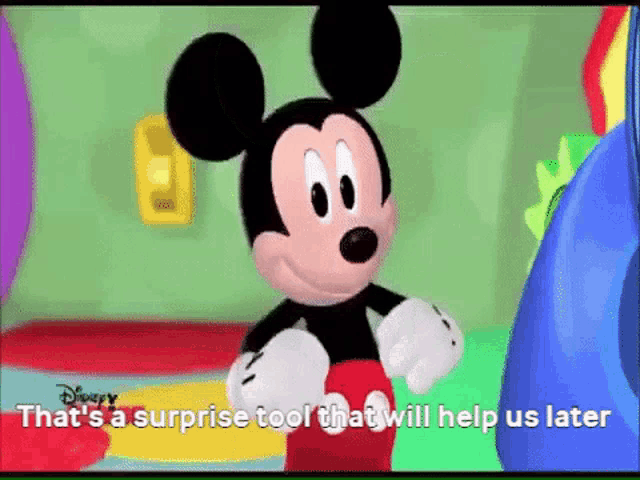

In [62]:
# This can be directly used to compute descriptors
mydescriptor = Descriptors._descList[6][1](mol)
print(mydescriptor)

44.096999999999994


In [63]:
assert Descriptors.MolWt(mol) == mydescriptor

In [64]:
def getMolDescriptors(mol, missingVal=None):
    ''' calculate the full list of descriptors for a molecule
    
        missingVal is used if the descriptor cannot be calculated
    '''
    res = {}
    for nm,fn in Descriptors._descList:
        # some of the descriptor fucntions can throw errors if they fail, catch those here:
        try:
            val = fn(mol)
        except:
            # print the error message:
            import traceback
            traceback.print_exc()
            # and set the descriptor value to whatever missingVal is
            val = missingVal
        res[nm] = val
    return res

mydescriptors = getMolDescriptors(mol)
print(mydescriptors)

{'MaxAbsEStateIndex': np.float64(2.125), 'MaxEStateIndex': np.float64(2.125), 'MinAbsEStateIndex': np.float64(1.25), 'MinEStateIndex': np.float64(1.25), 'qed': 0.3854706587740357, 'SPS': 6.0, 'MolWt': 44.096999999999994, 'HeavyAtomMolWt': 36.033, 'ExactMolWt': 44.062600255999996, 'NumValenceElectrons': 20, 'NumRadicalElectrons': 0, 'MaxPartialCharge': -0.059038363929048716, 'MinPartialCharge': -0.06564544121023959, 'MaxAbsPartialCharge': 0.06564544121023959, 'MinAbsPartialCharge': 0.059038363929048716, 'FpDensityMorgan1': 1.3333333333333333, 'FpDensityMorgan2': 1.3333333333333333, 'FpDensityMorgan3': 1.3333333333333333, 'BCUT2D_MWHI': 13.425713650761436, 'BCUT2D_MWLOW': 10.597286349238559, 'BCUT2D_CHGHI': 1.3523744386698806, 'BCUT2D_CHGLO': -1.4760582438091703, 'BCUT2D_LOGPHI': 1.5588136507614399, 'BCUT2D_LOGPLOW': -1.26961365076144, 'BCUT2D_MRHI': 3.9177136507614367, 'BCUT2D_MRLOW': 1.0892863492385598, 'AvgIpc': 0.9182958340544894, 'BalabanJ': np.float64(1.6329931618554523), 'BertzCT'

# Molecular Fingerprints and Similarity

Molecular fingerprints are binary vectors that encode the structural features of molecules. They are crucial for:
- Rapid similarity searches in large databases
- Structure-based virtual screening
- Machine learning applications

RDKit supports several types of fingerprints:
1. Morgan/Circular fingerprints (ECFP-like)
2. Topological fingerprints (path-based)
3. MACCS keys
4. Atom Pair fingerprints

We'll explore how to generate and use these fingerprints for similarity calculations:

In [65]:
# Another type of descriptors: circular/Morgan fingerprints

# We can use a generator to generate fingerprints for multiple molecules
fpgen = rdFingerprintGenerator.GetMorganGenerator(radius=2)
my_fingerprint = fpgen.GetFingerprint(mol)
print(np.array(my_fingerprint))

# Essentially an array of graph items

[0 0 0 ... 0 0 0]


In [66]:
# Another type of descriptors: topological fingerprints

fpgen = rdFingerprintGenerator.GetRDKitFPGenerator() # maxPath=2,fpSize=1024
my_fingerprint = fpgen.GetFingerprint(mol)
print(np.array(my_fingerprint))

# Essentially an array of graph items

[0 0 0 ... 0 0 0]


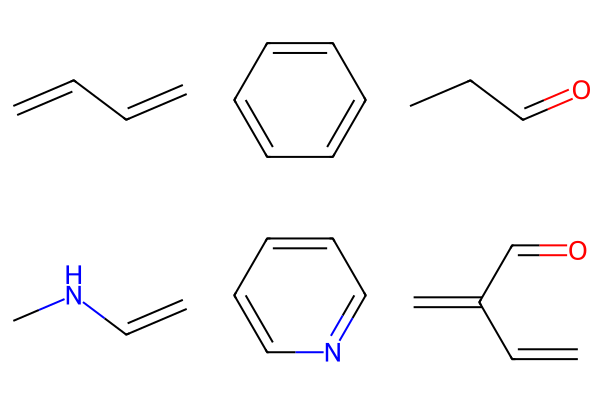

In [67]:
# Lets start working with a bunch of molecules
mol_smiles = [ "C=CC=C", "c1ccccc1", "C(C=O)C", "CNC=C", "c1ncccc1", "C=C(C=O)C=C"]
mols = [ Chem.MolFromSmiles(smiles) for smiles in mol_smiles ]
Draw.MolsToGridImage(mols)

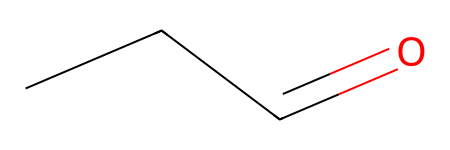

In [68]:
# Keep in mind that fingerprints are very compact and can be used to run similarity search in a very fast way
# What is the most similar molecule to our old trusty mol defined above?

fps = [fpgen.GetFingerprint(x) for x in mols]
similarities = [ DataStructs.TanimotoSimilarity(fp,my_fingerprint) for fp in fps ]
display(mols[np.argmax(similarities)])

In [69]:
# Substructure searches

patt = Chem.MolFromSmarts('C=O')
mol.HasSubstructMatch(patt)
for x in mols:
    print(x.HasSubstructMatch(patt))
    if x.HasSubstructMatch(patt):
        print(x.GetSubstructMatch(patt)) # Get the idx of the atoms that match pattern in x

False
False
True
(1, 2)
False
False
True
(2, 3)


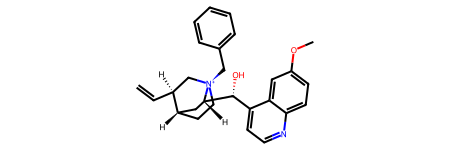

In [70]:
# Substructure manipulation, let us look at a more funky molecule

mol_smiles = 'C=C[C@H]1C[N@+]2(Cc3ccccc3)CC[C@H]1C[C@H]2[C@H](O)c1ccnc2ccc(OC)cc12'
mol = Chem.MolFromSmiles(mol_smiles)
display(mol)

In [71]:
r1 = ['Cc1ccccc1', 'Cc2c1ccccc1cc3ccccc23', 'Cc1cc(C(C)(C)C)cc(C(C)(C)C)c1', 'Cc1ccc(C(F)(F)F)cc1', 'Cc1ccccn1', 'Cc1ccccc1(C#N)']
r1_names = ['ph', 'ar', 'tbu', 'cf3', 'py', 'cn']

r2 = ['[C@H](O)', '[C@@H](NC(=S)Nc1cc(C(F)(F)F)cc(C(F)(F)F)c1)', '[C@@H](Nc1c(Nc2cc(C(F)(F)F)cc(C(F)(F)F)c2)c(=O)c1=O)']
r2_names = ['oh', 'thi', 'sqa']


In [72]:
# Lets do this the evil way, which sometimes is the simplest...
cat_list = []
names_list = []
for i in r1:
    for j in r2:
        cat_list.append('C=C[C@H]4C[N@+]5('+i+')CC[C@H]4C[C@H]5'+j+'c6ccnc7ccc(OC)cc67')      
for i in r1_names:
    for j in r2_names:
        names_list.append('cat_' + i + '_' + j)
        
#  These smiles codes might not be optimal, but they will be converted again below/
cat_list
print(names_list)

['cat_ph_oh', 'cat_ph_thi', 'cat_ph_sqa', 'cat_ar_oh', 'cat_ar_thi', 'cat_ar_sqa', 'cat_tbu_oh', 'cat_tbu_thi', 'cat_tbu_sqa', 'cat_cf3_oh', 'cat_cf3_thi', 'cat_cf3_sqa', 'cat_py_oh', 'cat_py_thi', 'cat_py_sqa', 'cat_cn_oh', 'cat_cn_thi', 'cat_cn_sqa']


C=C[C@H]1C[N@+]2(Cc3ccccc3)CC[C@H]1C[C@H]2[C@H](O)c1ccnc2ccc(OC)cc12
C=C[C@H]1C[N@+]2(Cc3ccccc3)CC[C@H]1C[C@H]2[C@@H](NC(=S)Nc1cc(C(F)(F)F)cc(C(F)(F)F)c1)c1ccnc2ccc(OC)cc12
C=C[C@H]1C[N@+]2(Cc3ccccc3)CC[C@H]1C[C@H]2[C@@H](Nc1c(Nc2cc(C(F)(F)F)cc(C(F)(F)F)c2)c(=O)c1=O)c1ccnc2ccc(OC)cc12
C=C[C@H]1C[N@+]2(Cc3c4ccccc4cc4ccccc34)CC[C@H]1C[C@H]2[C@H](O)c1ccnc2ccc(OC)cc12
C=C[C@H]1C[N@+]2(Cc3c4ccccc4cc4ccccc34)CC[C@H]1C[C@H]2[C@@H](NC(=S)Nc1cc(C(F)(F)F)cc(C(F)(F)F)c1)c1ccnc2ccc(OC)cc12
C=C[C@H]1C[N@+]2(Cc3c4ccccc4cc4ccccc34)CC[C@H]1C[C@H]2[C@@H](Nc1c(Nc2cc(C(F)(F)F)cc(C(F)(F)F)c2)c(=O)c1=O)c1ccnc2ccc(OC)cc12
C=C[C@H]1C[N@+]2(Cc3cc(C(C)(C)C)cc(C(C)(C)C)c3)CC[C@H]1C[C@H]2[C@H](O)c1ccnc2ccc(OC)cc12
C=C[C@H]1C[N@+]2(Cc3cc(C(C)(C)C)cc(C(C)(C)C)c3)CC[C@H]1C[C@H]2[C@@H](NC(=S)Nc1cc(C(F)(F)F)cc(C(F)(F)F)c1)c1ccnc2ccc(OC)cc12
C=C[C@H]1C[N@+]2(Cc3cc(C(C)(C)C)cc(C(C)(C)C)c3)CC[C@H]1C[C@H]2[C@@H](Nc1c(Nc2cc(C(F)(F)F)cc(C(F)(F)F)c2)c(=O)c1=O)c1ccnc2ccc(OC)cc12
C=C[C@H]1C[N@+]2(Cc3ccc(C(F)(F)F)cc3)CC[C@H]1C

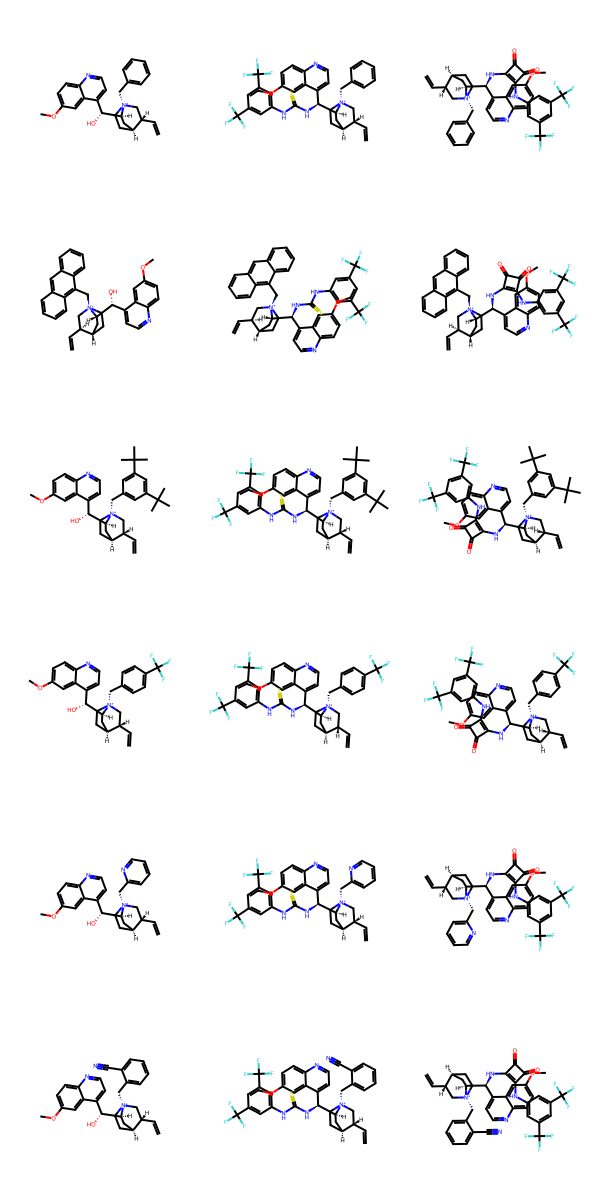

In [73]:
mol_list = []
n_mol = 0
for smiles in cat_list:
    mol = Chem.MolFromSmiles(smiles)
    mol = Chem.MolFromSmiles(Chem.MolToSmiles(mol))
    mol_list.append(mol)
    print(Chem.MolToSmiles(mol))
    n_mol += 1
img = Draw.MolsToGridImage(mol_list, molsPerRow=3)
img

In [74]:
# Of course, these manipulations and others can be done at the molecular-graph level... but thats for another day

# 3D Conformer Generation and Visualization

While SMILES strings represent 2D molecular topology, many chemical applications require 3D molecular structures. RDKit provides powerful tools for:
- Generating 3D conformers
- Energy minimization
- Conformer analysis
- 3D visualization

The process typically involves:
1. Converting 2D to 3D using distance geometry
2. Adding hydrogens
3. Energy minimization using force fields
4. Interactive visualization

Let's explore these capabilities:

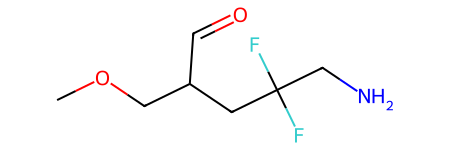


     RDKit          3D

 25 24  0  0  0  0  0  0  0  0999 V2000
   -3.2035    0.6700   -0.1319 C   0  0  0  0  0  0  0  0  0  0  0  0
   -2.6480   -0.3362   -0.8158 O   0  0  0  0  0  0  0  0  0  0  0  0
   -1.9220   -1.2958   -0.2563 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.6458   -0.8478    0.4234 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.9326    0.0776    1.5207 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.5747    1.2070    1.7024 O   0  0  0  0  0  0  0  0  0  0  0  0
    0.3343   -0.2914   -0.5581 C   0  0  0  0  0  0  0  0  0  0  0  0
    1.6100    0.0824    0.0682 C   0  0  0  0  0  0  0  0  0  0  0  0
    2.1156   -1.0856    0.6668 F   0  0  0  0  0  0  0  0  0  0  0  0
    1.5939    1.1524    0.8808 F   0  0  0  0  0  0  0  0  0  0  0  0
    2.6878    0.4013   -0.9986 C   0  0  0  0  0  0  0  0  0  0  0  0
    3.8640    0.7455   -0.2173 N   0  0  0  0  0  0  0  0  0  0  0  0
   -3.8938    0.3553    0.6995 H   0  0  0  0  0  0  0  0  0  0  0  0
   -2.6213    1.5222    0

In [75]:
# Since rdkit molecules are graphs, we dont have coordinates for them. How do we do that?
# Enter the fantastic world of embeddings

mol = Chem.MolFromSmiles("COCC(C=O)CC(F)(F)CN")
display(mol)
molH = Chem.AddHs(mol)
params = AllChem.ETKDGv3() # This is one of many methods depending on parameters, mostly empirical choices
params.randomSeed = 0xf00d # optional random seed for reproducibility
AllChem.EmbedMolecule(molH, params)
print(Chem.MolToMolBlock(molH))

In [76]:
D = AllChem.Get3DDistanceMatrix(molH)
print(D)

[[0.         1.33743206 2.34999092 3.02560394 2.8704133  3.25018436
  3.69088091 4.85343703 5.65807656 4.92688017 5.96084849 7.06847878
  1.12548683 1.07950075 1.1676535  2.64828815 3.31130797 4.05008695
  3.10061286 3.22315047 4.27111086 6.42003272 5.72219615 7.97420116
  7.07569046]
 [1.33743206 0.         1.32702716 2.4095916  2.92798636 3.60847232
  2.99383201 4.36894415 5.04500472 4.80506772 5.38969885 6.62835189
  2.07990611 2.11065019 2.00295826 2.02190373 2.06421451 3.34114618
  3.31053877 2.71023383 3.27341531 5.64413233 5.25136061 7.45233321
  6.82759583]
 [2.34999092 1.32702716 0.         1.51369036 2.4542061  3.45189887
  2.48815224 3.80521747 4.14709871 4.43267074 4.9680512  6.13564142
  2.74369615 2.93673771 3.25912222 1.14440491 1.13227139 2.1545104
  2.77370459 2.74785386 2.66161358 5.10883678 5.10286707 6.9422064
  6.45995468]
 [3.02560394 2.4095916  1.51369036 0.         1.46388922 2.42140315
  1.49451275 2.46580552 2.78231215 3.03756149 3.83348749 4.82572956
  3.4746

In [77]:
# Lets see our molecule in 3D

view = py3Dmol.view()
view.removeAllModels()
view.setViewStyle({'style':'outline','color':'black','width':0.1})
view.addModel(Chem.MolToMolBlock(molH, confId=0), 'sdf')
ref_m = view.getModel()
ref_m.setStyle({},{'stick':{'colorscheme':'greyCarbon'}})
view.zoomTo()
view.show()

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

In [78]:
# Of course, its not always that easy.

In [79]:
def genConf(m, nc=10, atomIds=[0]):
    nr = int(AllChem.CalcNumRotatableBonds(m))
    m = Chem.AddHs(m)
    Chem.AssignAtomChiralTagsFromStructure(m, replaceExistingTags=True)
    if nc == "X":
        if nr < 3:
            nc = 50
        else:
            nc = nr**3
    params = AllChem.ETKDGv3()
    ids = AllChem.EmbedMultipleConfs(m, nc, params)
    rmslist = []
    AllChem.AlignMolConformers(m, RMSlist=rmslist, atomIds=atomIds)
    energies = []
    for id in ids:		
        prop = AllChem.MMFFGetMoleculeProperties(m, mmffVariant="MMFF94s")
        ff = AllChem.MMFFGetMoleculeForceField(m, prop, confId=id)
        ff.Minimize()
        en = float(ff.CalcEnergy())
        energies.append(en)	
    return m, rmslist, energies

def visConf(m):
    view = py3Dmol.view()
    view.removeAllModels()
    view.setViewStyle({'style':'outline','color':'black','width':0.1})
    for idx, _ in enumerate(m.GetConformers()):
        view.addModel(Chem.MolToMolBlock(m, confId=idx), 'sdf')
        ref_m = view.getModel()
        ref_m.setStyle({},{'stick':{'colorscheme':'greyCarbon'}})
    view.zoomTo()
    view.show()

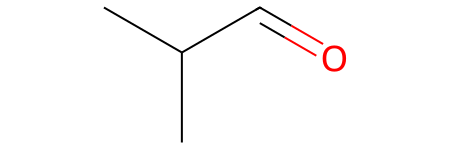

In [80]:
# Lets try with our more refined workflow
mol = Chem.MolFromSmiles("COCC(C=O)CC(F)(F)CN")
patt = Chem.MolFromSmiles('CC(C=O)C');patt


In [81]:
if mol.HasSubstructMatch(patt):
    idxs = mol.GetSubstructMatch(patt)

atomIds = list(idxs)

In [82]:
mol3d, rmslist, energies = genConf(mol, atomIds=atomIds)

print(energies, rmslist)
print(mol3d.GetNumConformers(),mol3d.GetConformer().Is3D())

[51.37500108488452, 49.12664789938679, 44.36028695330327, 42.123748325402644, 48.50425941662651, 42.21368331090758, 49.27012811236209, 41.55949265565212, 47.62364202662354, 47.07008923854025] [0.5068999312327445, 0.5099617528691829, 0.4701762447485794, 0.4523922883738393, 0.0600139855014725, 0.4869153717231231, 0.4824518307173371, 0.4713605233506348, 0.5428609606179905]
10 True


In [83]:
# Lets get the conformer with smaller energies
lowest_energy_idx = int(np.argmin(np.array(energies)))
print(lowest_energy_idx)
lowest_energy_mol = mol3d.GetConformer(lowest_energy_idx)

7


In [84]:

visConf(mol3d)

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

In [85]:
def drawit(m,p,confId=-1):
    mb = Chem.MolToMolBlock(m,confId=confId)
    p.removeAllModels()
    p.addModel(mb,'sdf')
    p.setStyle({'stick':{}})
    p.setBackgroundColor('0xeeeeee')
    p.zoomTo()
    return p.show()



In [86]:
from ipywidgets import interact, interactive, fixed

# now construct the view and interactive widget:
p = py3Dmol.view(width=400,height=400)
interact(drawit, m=fixed(mol3d),p=fixed(p),confId=(0,mol3d.GetNumConformers()-1));

interactive(children=(IntSlider(value=0, description='confId', max=9), Output()), _dom_classes=('widget-intera…

# Working with XYZ Files

XYZ files are a simple format for representing molecular coordinates, commonly used in computational chemistry. They contain:
1. Number of atoms
2. Comment line
3. Atomic coordinates (element symbol and x, y, z coordinates)

RDKit can:
- Read XYZ files
- Determine connectivity automatically
- Convert to other formats (SMILES, MOL)
- Visualize the structures

Let's see how to work with XYZ files:

In [87]:
# Finally, can we read xyz molecules as rdkit graphs?

def cleanup_xyz(fname):
    ind = open(fname).readlines()
    nAts = int(ind[0])
    ind[1] = '\n'
    ind = ind[:nAts+2]
    for i in range(2,nAts+2):
        l = ind[i]
        l = l.split('\t')
        ind[i] = '\t'.join(l)
    ind = ''.join(ind)
    print(ind)
    return ind

ind = cleanup_xyz("example.xyz")
raw_mol = Chem.MolFromXYZBlock(ind)
print(raw_mol.GetNumAtoms(),raw_mol.GetNumBonds())

14

C   2.142   1.395  -8.932  
C   3.631   1.416  -8.537  
C   4.203  -0.012  -8.612  
C   5.691   0.009  -8.218  
H   1.604   0.760  -8.260               
H   1.745   2.388  -8.880  
H   2.043   1.024  -9.930               
H   4.169   2.051  -9.210  
H   3.731   1.788  -7.539               
H   3.665  -0.647  -7.940  
H   4.104  -0.384  -9.610  
H   6.088  -0.983  -8.270  
H   5.791   0.381  -7.220  
H   6.230   0.644  -8.890  

14 0


In [88]:
def draw_with_spheres(mol):
    v = py3Dmol.view(width=300,height=300)
    IPythonConsole.addMolToView(mol,v)
    v.zoomTo()
    v.setStyle({'sphere':{'radius':0.3},'stick':{'radius':0.2}});
    v.show()


In [89]:
draw_with_spheres(raw_mol)

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

In [90]:
conn_mol = Chem.Mol(raw_mol)
rdDetermineBonds.DetermineConnectivity(conn_mol,charge=0)
draw_with_spheres(conn_mol)
conn_mol_noh = Chem.RemoveHs(conn_mol)
smiles = Chem.MolToSmiles(conn_mol_noh,kekuleSmiles=True)
print(smiles)

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

CCCC


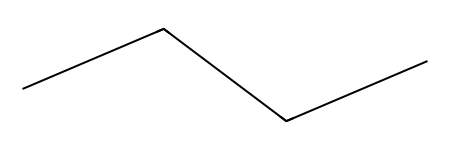

In [91]:
new_mol = Chem.MolFromSmiles(smiles)
display(new_mol)

# Visualizing Chemical Space

When working with molecular fingerprints or descriptors, we often deal with high-dimensional data that can be difficult to interpret. Dimensionality reduction techniques help us to:
- Visualize relationships between molecules
- Identify clusters of similar compounds
- Analyze structure-property relationships
- Map chemical space coverage

Common techniques include:
- Principal Component Analysis (PCA)
- t-SNE (t-Distributed Stochastic Neighbor Embedding)
- UMAP (Uniform Manifold Approximation and Projection)

Let's explore how to visualize our molecular dataset using these techniques:

In [92]:
# For demonstration, we'll use a small list of a few SMILES strings from ZINC.
# In a real scenario, you might load this from a CSV or SDF file.

with open("SMILES_ZINC_5000.csv", "r") as f:
    smiles_list = [line.strip() for line in f.readlines()][:50]

molecule_names = smiles_list  # [f"Mol_{i+1}" for i in range(len(smiles_list))]

# Create molecules from SMILES
mols = [Chem.MolFromSmiles(s) for s in smiles_list]
# Remove any None values (failed SMILES parsing)
mols = [m for m in mols if m is not None]
print(f"\nNumber of valid molecules: {len(mols)}")

# Names will be the SMILES strings themselves
names = smiles_list[:len(mols)]

# Calculate various descriptors for each molecule
desc_list = []
for mol in mols:
    descriptors = getMolDescriptors(mol)
    desc_list.append(descriptors)

# Convert to DataFrame
df = pd.DataFrame(desc_list)
print(f"Number of descriptors: {df.shape[1]}")
print("\nFirst few descriptor names:")
print(list(df.columns)[:5])


Number of valid molecules: 50
Number of descriptors: 217

First few descriptor names:
['MaxAbsEStateIndex', 'MaxEStateIndex', 'MinAbsEStateIndex', 'MinEStateIndex', 'qed']


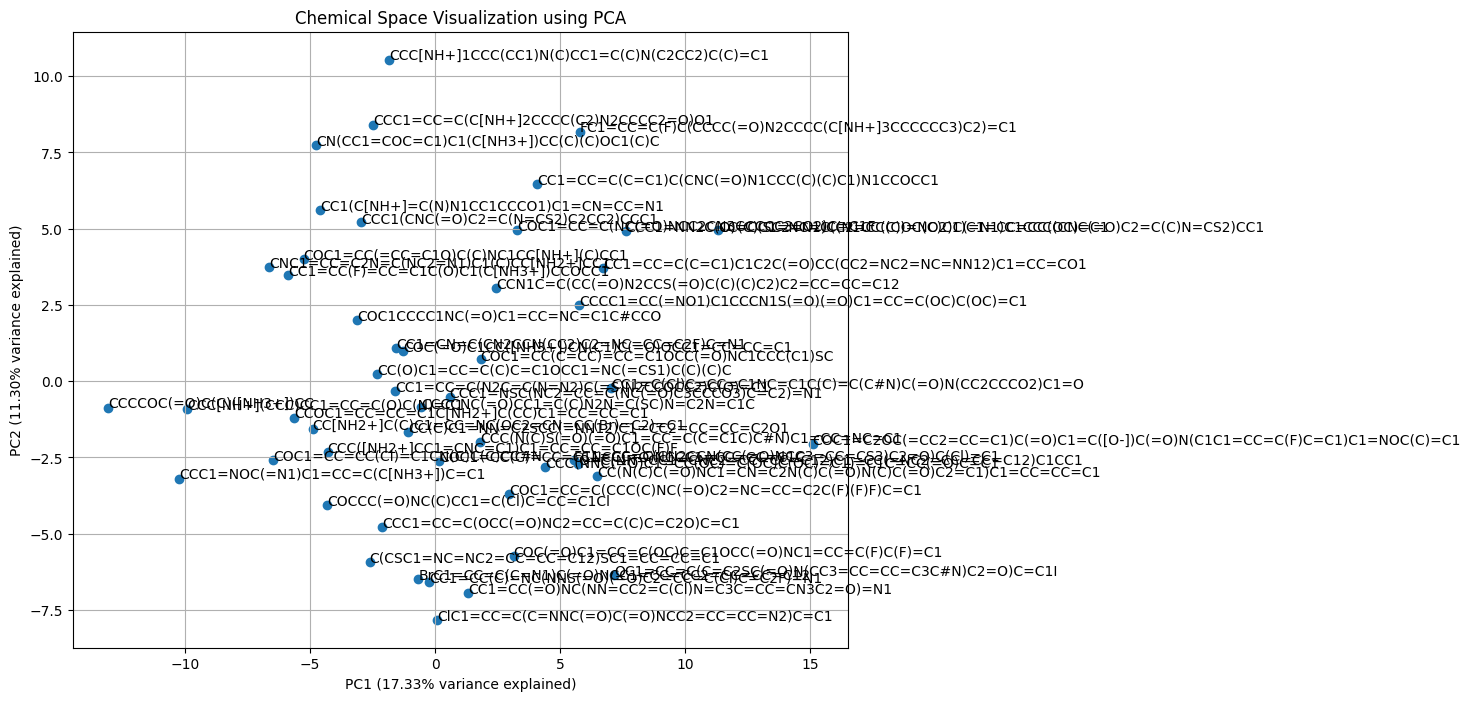


Most important descriptors for PC1:
         descriptor  contribution
106  HeavyAtomCount      0.177644
46        LabuteASA      0.177290
32             Chi1      0.176877
29             Chi0      0.175402
8        ExactMolWt      0.172583


In [93]:
# Let's use PCA first - it's the simplest approach
from sklearn.decomposition import PCA

# Prepare the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Create a scatter plot
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
plt.scatter(X_pca[:, 0], X_pca[:, 1])

# Add labels for each point
for i, name in enumerate(names):
    plt.annotate(name, (X_pca[i, 0], X_pca[i, 1]))

plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.2%} variance explained)')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.2%} variance explained)')
plt.title('Chemical Space Visualization using PCA')
plt.grid(True)
plt.show()

# Print the most important descriptors for each principal component
print("\nMost important descriptors for PC1:")
pc1_contributions = pd.DataFrame({
    'descriptor': df.columns,
    'contribution': abs(pca.components_[0])
}).sort_values('contribution', ascending=False)
print(pc1_contributions.head())

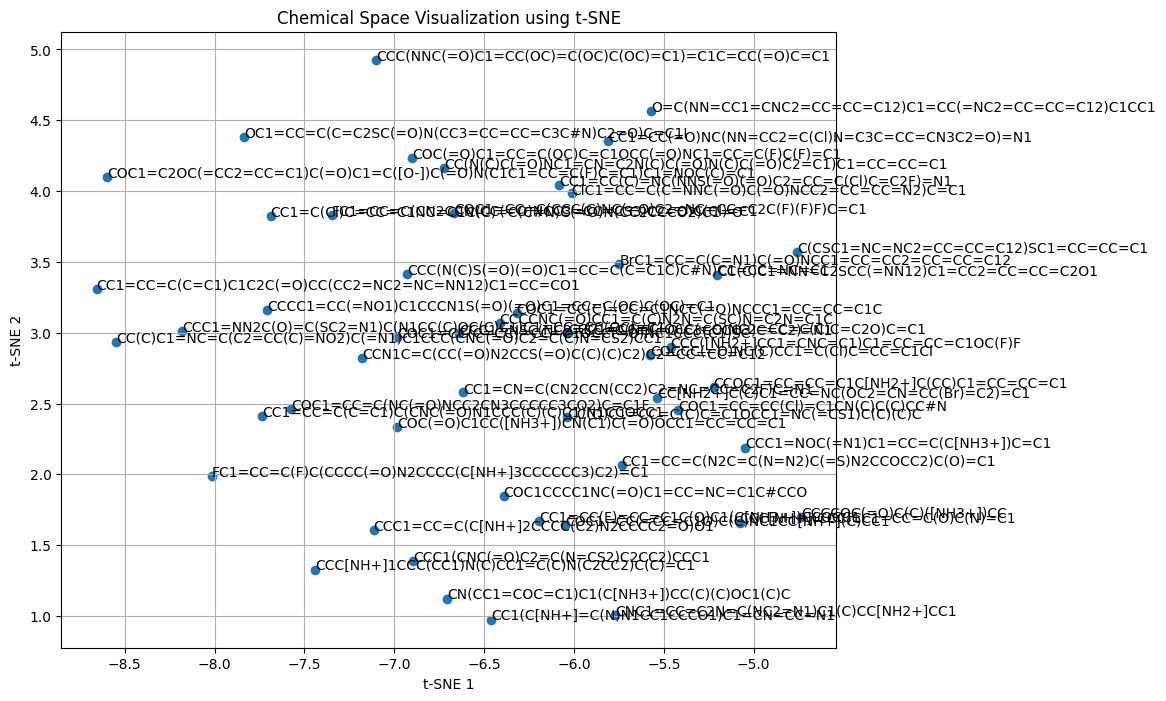

In [94]:
# Now let's try t-SNE, which is better at preserving local structure
from sklearn.manifold import TSNE

# Apply t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

# Create a scatter plot
plt.figure(figsize=(10, 8))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1])

# Add labels for each point
for i, name in enumerate(names):
    plt.annotate(name, (X_tsne[i, 0], X_tsne[i, 1]))

plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.title('Chemical Space Visualization using t-SNE')
plt.grid(True)
plt.show()

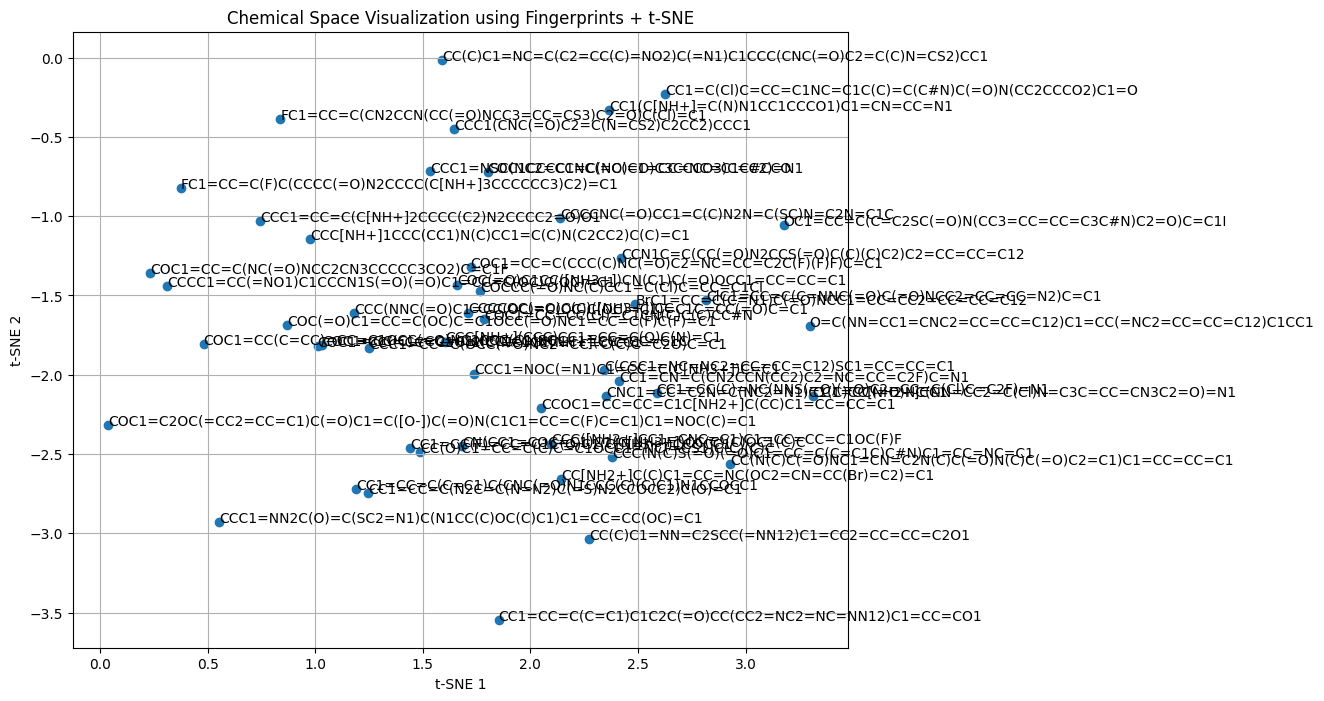

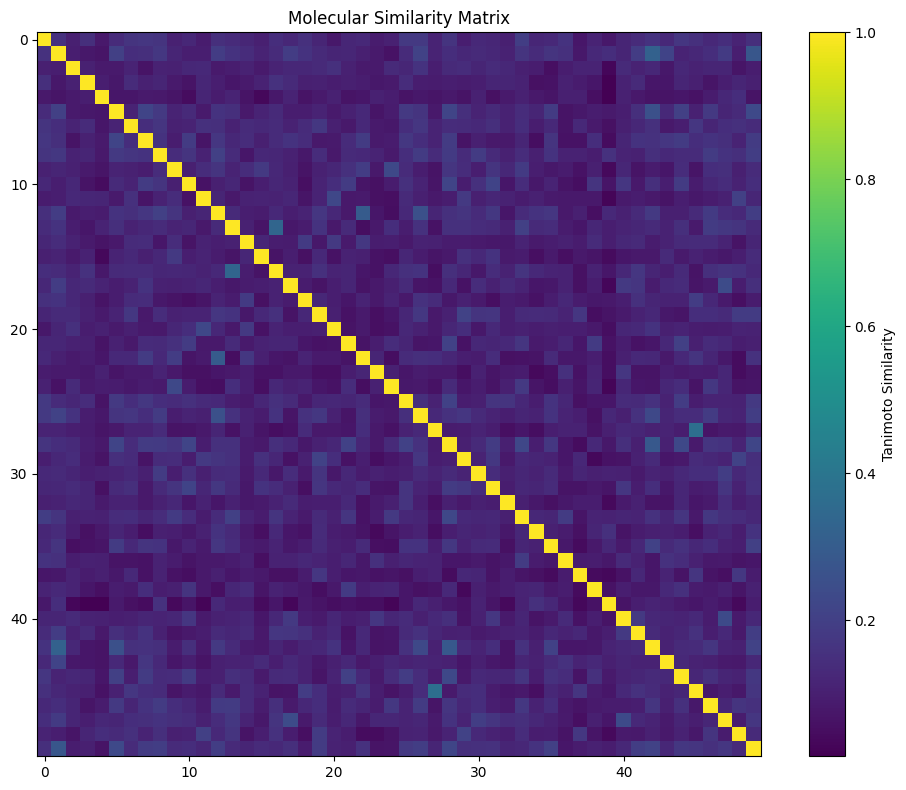

In [95]:
# Let's also try visualizing based on fingerprints instead of descriptors
# This often gives more chemically intuitive results

# Generate Morgan fingerprints
fpgen = rdFingerprintGenerator.GetMorganGenerator(radius=2)
fps = [fpgen.GetFingerprint(m) for m in mols]

# Convert to numpy array
fp_array = []
for fp in fps:
    arr = np.zeros((0,), dtype=np.int8)
    DataStructs.ConvertToNumpyArray(fp, arr)
    fp_array.append(arr)
fp_array = np.array(fp_array)

# Apply t-SNE to fingerprints
tsne_fp = TSNE(n_components=2, random_state=42)
X_tsne_fp = tsne_fp.fit_transform(fp_array)

# Create a scatter plot
plt.figure(figsize=(10, 8))
plt.scatter(X_tsne_fp[:, 0], X_tsne_fp[:, 1])

# Add labels for each point
for i, name in enumerate(names):
    plt.annotate(name, (X_tsne_fp[i, 0], X_tsne_fp[i, 1]))

plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.title('Chemical Space Visualization using Fingerprints + t-SNE')
plt.grid(True)
plt.show()

# Let's also show a similarity matrix for these compounds
similarity_matrix = np.zeros((len(fps), len(fps)))
for i in range(len(fps)):
    for j in range(len(fps)):
        similarity_matrix[i,j] = DataStructs.TanimotoSimilarity(fps[i], fps[j])

plt.figure(figsize=(10, 8))
plt.imshow(similarity_matrix, cmap='viridis')
plt.colorbar(label='Tanimoto Similarity')

plt.title('Molecular Similarity Matrix')
plt.tight_layout()
plt.show()

# Selecting Diverse Molecules

When working with large chemical libraries, it's often useful to select a diverse subset of molecules that represents the chemical space well. Farthest Point Sampling (FPS) is a simple but effective method for this:

1. Start with a random molecule
2. Find the molecule that's most distant from the current selection
3. Add it to the selection
4. Repeat until desired number of molecules is selected

This ensures good coverage of the chemical space with minimal redundancy.

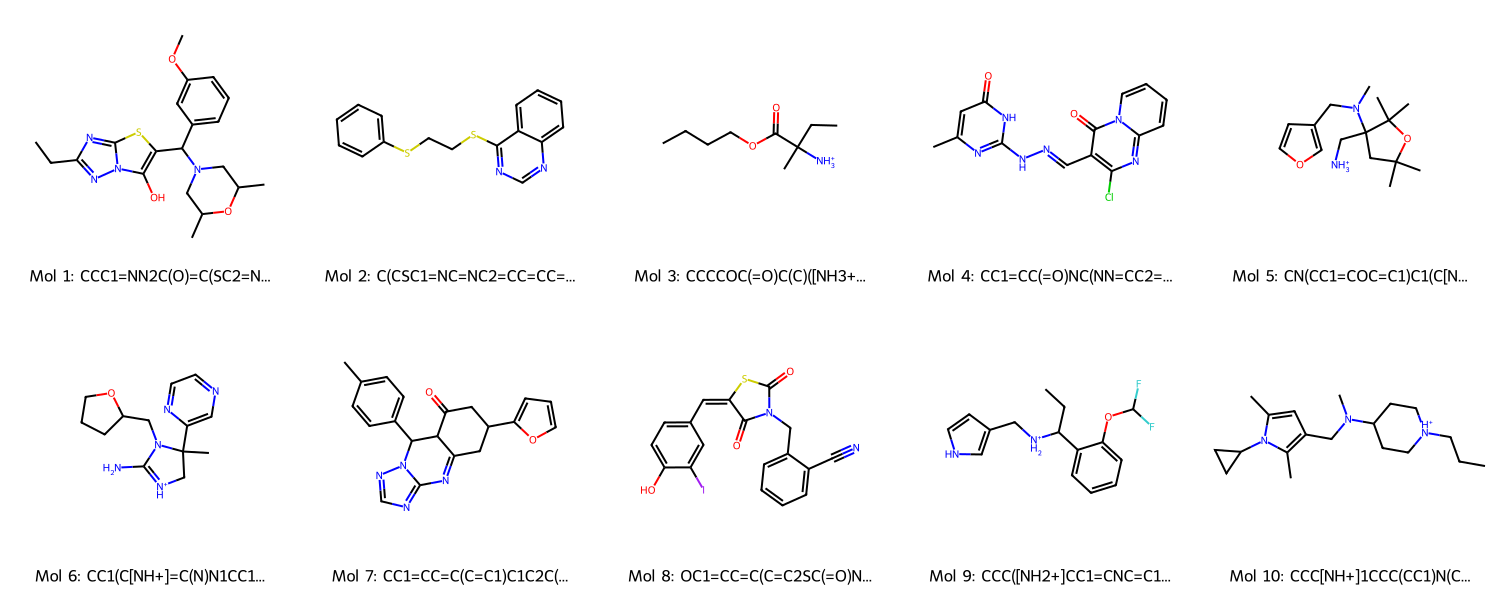

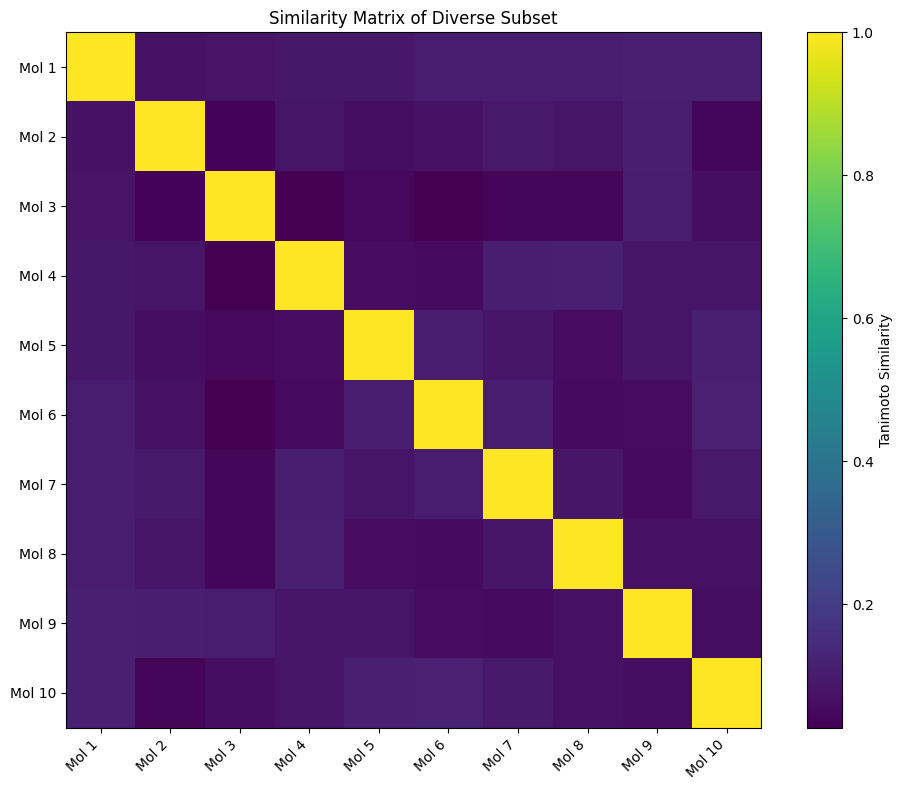

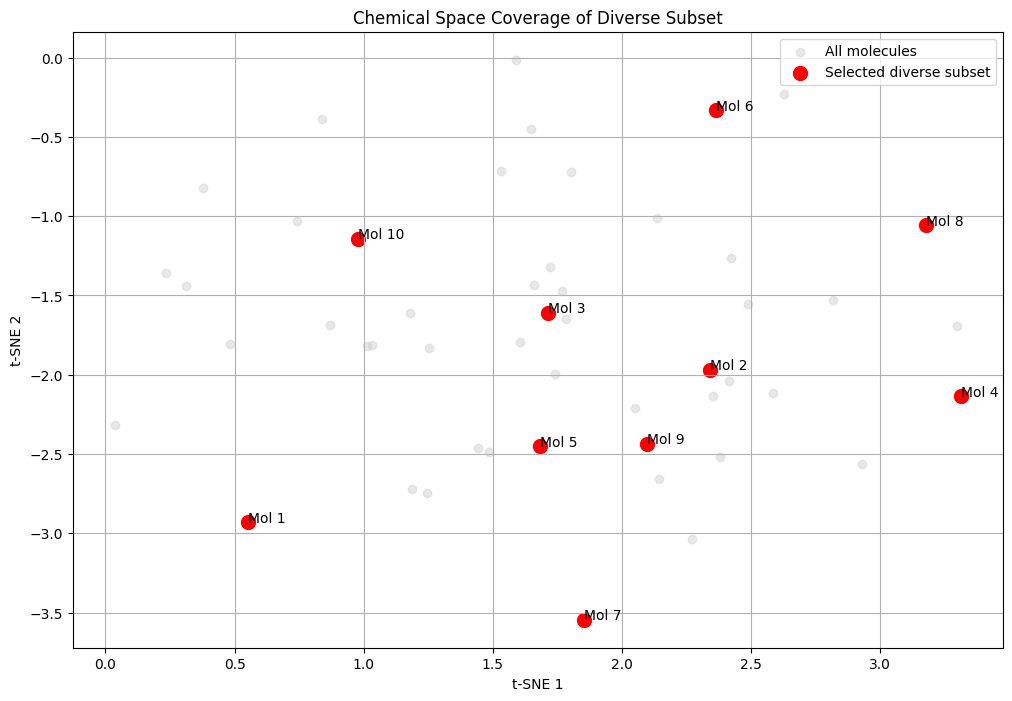


Diversity analysis:
Average pairwise Tanimoto similarity:
- Full set: 0.114
- Diverse subset: 0.078

Minimum pairwise Tanimoto similarity:
- Full set: 0.015
- Diverse subset: 0.027


In [96]:
# Function to perform farthest point sampling
def select_diverse_subset(similarity_matrix, n_select=10, first_idx=None):
    if first_idx is None:
        first_idx = np.random.randint(len(similarity_matrix))
    
    # Initialize selection with the first point
    selected = [first_idx]
    
    # Calculate distances (1 - similarity) from the first point
    distances = 1 - similarity_matrix[first_idx]
    
    # Select remaining points
    while len(selected) < n_select:
        # Find the point that's farthest from all selected points
        min_distances = distances
        for idx in selected[1:]:
            min_distances = np.minimum(min_distances, 1 - similarity_matrix[idx])
        
        # Select the point with maximum minimum distance
        next_idx = np.argmax(min_distances)
        selected.append(next_idx)
    
    return selected

# Select 10 diverse molecules using FPS
diverse_indices = select_diverse_subset(similarity_matrix, n_select=10)
diverse_mols = [mols[idx] for idx in diverse_indices]
diverse_names = [names[idx] for idx in diverse_indices]

# Display the selected molecules in a grid
img = Draw.MolsToGridImage(diverse_mols,
                          molsPerRow=5,
                          subImgSize=(300,300),
                          legends=[f"Mol {i+1}: {name[:20]}..." for i, name in enumerate(diverse_names)])
display(img)

# Create a smaller similarity matrix for the diverse subset
diverse_similarity = similarity_matrix[np.ix_(diverse_indices, diverse_indices)]

# Visualize the similarity matrix for the diverse subset
plt.figure(figsize=(10, 8))
plt.imshow(diverse_similarity, cmap='viridis')
plt.colorbar(label='Tanimoto Similarity')
plt.xticks(range(len(diverse_names)), [f"Mol {i+1}" for i in range(len(diverse_names))], rotation=45, ha='right')
plt.yticks(range(len(diverse_names)), [f"Mol {i+1}" for i in range(len(diverse_names))])
plt.title('Similarity Matrix of Diverse Subset')
plt.tight_layout()
plt.show()

# Show the selected molecules in chemical space using t-SNE
# First, highlight the selected points in the full t-SNE plot
plt.figure(figsize=(12, 8))
plt.scatter(X_tsne_fp[:, 0], X_tsne_fp[:, 1], c='lightgray', alpha=0.5, label='All molecules')
plt.scatter(X_tsne_fp[diverse_indices, 0], X_tsne_fp[diverse_indices, 1], 
           c='red', s=100, label='Selected diverse subset')

# Add labels for selected points only
for i, idx in enumerate(diverse_indices):
    plt.annotate(f"Mol {i+1}", (X_tsne_fp[idx, 0], X_tsne_fp[idx, 1]))

plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.title('Chemical Space Coverage of Diverse Subset')
plt.legend()
plt.grid(True)
plt.show()

# Print statistics about the diverse subset
print("\nDiversity analysis:")
print("Average pairwise Tanimoto similarity:")
print(f"- Full set: {np.mean(similarity_matrix[np.triu_indices_from(similarity_matrix, k=1)]):.3f}")
print(f"- Diverse subset: {np.mean(diverse_similarity[np.triu_indices_from(diverse_similarity, k=1)]):.3f}")
print("\nMinimum pairwise Tanimoto similarity:")
print(f"- Full set: {np.min(similarity_matrix[np.triu_indices_from(similarity_matrix, k=1)]):.3f}")
print(f"- Diverse subset: {np.min(diverse_similarity[np.triu_indices_from(diverse_similarity, k=1)]):.3f}")